# 聚类方法

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [0]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [0]:
iris = datasets.load_iris()

In [68]:
gt = iris['target'];gt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3类

In [11]:
iris['data'][:,:2].shape

(150, 2)

In [0]:
data = iris['data'][:,:2]

In [0]:
x = data[:,0]
y = data[:,1]

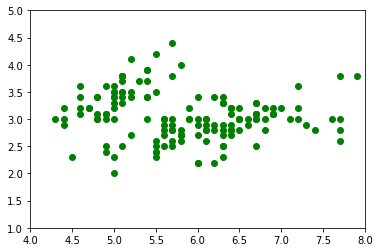

In [25]:
plt.scatter(x, y, color='green')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [0]:
# 定义聚类数的节点

class ClusterNode:
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [0]:
def euler_distance(point1: np.ndarray, point2: list) -> float:
    """
    计算两点之间的欧拉距离，支持多维
    """
    distance = 0.0
    for a, b in zip(point1, point2):
        distance += math.pow(a - b, 2)
    return math.sqrt(distance)

In [0]:
# 层次聚类（聚合法）

class Hierarchical:
    def __init__(self, k):
        self.k = k
        self.labels = None
        
    def fit(self, x):
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)]
        distances = {}
        point_num, feature_num = x.shape
        self.labels = [-1] * point_num
        currentclustid = -1
        while(len(nodes)) > self.k:
            min_dist = math.inf
            nodes_len = len(nodes)
            closest_part = None
            for i in range(nodes_len - 1):
                for j in range(i+1, nodes_len):
                    d_key = (nodes[i].id, nodes[j].id)
                    if d_key not in distances:
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec)
                    d = distances[d_key]
                    if d < min_dist:
                        min_dist = d
                        closest_part = (i, j)
                        
            part1, part2 = closest_part
            node1, node2 = nodes[part1], nodes[part2]
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)
                        for i in range(feature_num)]
            new_node = ClusterNode(vec=new_vec,
                                   left=node1,
                                   right=node2,
                                   distance=min_dist,
                                   id=currentclustid,
                                   count=node1.count + node2.count)
            currentclustid -= 1
            del nodes[part2], nodes[part1]
            nodes.append(new_node)
            
        self.nodes = nodes
        self.calc_label()
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        for i, node in enumerate(self.nodes):
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)

    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None:
            self.labels[node.id] = label
        if node.left:
            self.leaf_traversal(node.left, label)
        if node.right:
            self.leaf_traversal(node.right, label)
            
# https://zhuanlan.zhihu.com/p/32438294

In [49]:
my = Hierarchical(3)
my.fit(data)
labels = np.array(my.labels)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


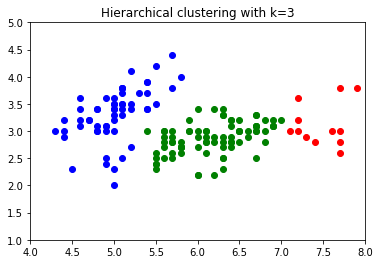

In [63]:
# visualize result

cat1 = data[np.where(labels==0)]
cat2 = data[np.where(labels==1)]
cat3 = data[np.where(labels==2)]

plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [66]:
sk = cluster.AgglomerativeClustering(3)
sk.fit(data)
labels_ = sk.labels_
print(labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


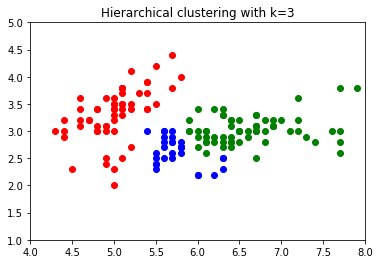

In [67]:
# visualize result of sklearn

cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [0]:
# kmeans

class MyKmeans:
    def __init__(self, k, n=20):
        self.k = k
        self.n = n
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None:
            idx = np.random.randint(low=0, high=len(x), size=self.k)
            centers = x[idx]
        #print(centers)
        
        inters = 0
        while inters < self.n:
            #print(inters)
            #print(centers)
            points_set = {key: [] for key in range(self.k)}

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5)
                points_set[nearest_index].append(p)

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k])
                
            inters += 1

        
            
        return points_set, centers
        

In [0]:
m = MyKmeans(3)
points_set, centers = m.fit(data)

In [205]:
centers

array([[5.02173913, 3.44782609],
       [5.77358491, 2.69245283],
       [6.81276596, 3.07446809]])

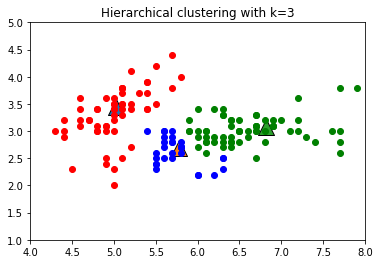

In [206]:
# visualize result

cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [0]:
# using sklearn

kmeans = KMeans(n_clusters=3, max_iter=100).fit(data)
gt_labels__ = kmeans.labels_
centers__ = kmeans.cluster_centers_

In [163]:
gt_labels__

array([1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [200]:
centers__

array([[5.77358491, 2.69245283],
       [5.02173913, 3.44782609],
       [6.81276596, 3.07446809]])

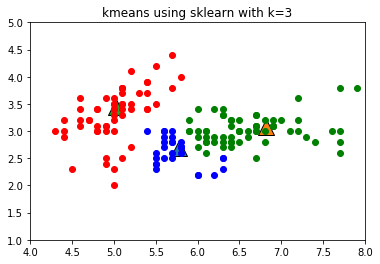

In [164]:
# visualize result

cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

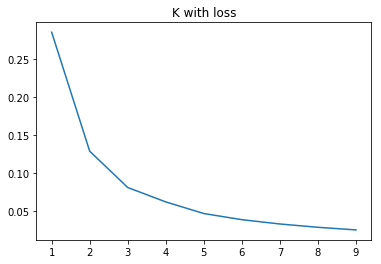

In [129]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data)
    loss.append(kmeans.inertia_ / len(data) / 3)

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

##### 例 14.2

In [0]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]]

In [208]:
np.asarray(X)

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [0]:
m = MyKmeans(2, 100)
points_set, centers = m.fit(np.asarray(X))

In [210]:
points_set

{0: [array([5, 0]), array([5, 2])],
 1: [array([0, 2]), array([0, 0]), array([1, 0])]}

In [211]:
centers

array([[5, 1],
       [0, 0]])

In [0]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X))

In [213]:
kmeans.labels_

array([0, 0, 0, 1, 1], dtype=int32)

In [214]:
kmeans.cluster_centers_

array([[0.33333333, 0.66666667],
       [5.        , 1.        ]])